# Работа 2.2 (2.3). Изучение спектров атома водорода и молекулы йода.

In [18]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

%matplotlib inline
sns.set()

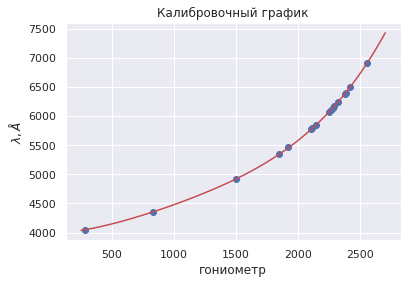

In [52]:
fit_data = pd.read_excel("fit.xlsx")
X, Y = fit_data["gon"], fit_data["lambda"]
plt.plot(X, Y, "bo")
plt.title("Калибровочный график")
plt.xlabel("гониометр")
plt.ylabel("$\lambda, \AA$")
params, cov = np.polyfit(X, Y, 4, full=False, cov=True)
fit_curve = np.poly1d(params)
inter = np.linspace(250, 2700, 100)
plt.plot(inter, fit_curve(inter), "r")
fit_curve_error = lambda gon: ((gon**4*cov[0][0])**2+(gon**3*cov[1][1])**2+(gon**2*cov[2][2])**2+(gon*cov[3][3])**2+(cov[4][4])**2)**0.5

In [97]:
H2 = pd.read_excel("H2.xlsx")
H2["lambda, angstrom"] = H2["gon"].apply(fit_curve)
H2["sigma_lambda, angstrom"] = H2["gon"].apply(fit_curve_error)
get_ridberg = lambda L, m: 1/(L*(1/4-1/(m**2)))
get_ridberg_err = lambda L, E, m:  E/(L**2*(1/4-1/(m**2)))
R = [get_ridberg(L, m)*10e4 for L,m in zip(H2["lambda, angstrom"][1:],  [4, 5, 6])]
R_err = [get_ridberg_err(L, E, m)*10e4 for L,E,m in zip(H2["lambda, angstrom"][1:], H2["sigma_lambda, angstrom"][1:] , [4, 5, 6])]
Ridberg = sum(R)/len(R)
Ridberg_error = sum(R_err)/len(R_err)
print("Ridberg = {:.4}".format(Ridberg), "+-", "{:.2}".format(Ridberg_error), "см^-1")

Ridberg = 109.8 +- 9.1 см^-1


In [109]:
I2 = pd.read_excel("I2.xlsx")
I2["lambda, angstrom"] = H2["gon"].apply(fit_curve)
I2["sigma_lambda, angstrom"] = H2["gon"].apply(fit_curve_error)
ash_nu_2 = ((8e-6)/5)*(1/I2["lambda, angstrom"][1]-I2["lambda, angstrom"][0])
print("ash_nu_2 = {:.2}".format(ash_nu_2), "эВ")

ash_nu_2 = -0.011 эВ
